# PySpark questions
 You are expected to perform research online for many of these questions, so please note any resources you referred to with a link or comment. Your answers do not need to fit into one cell. Just ensure that your answers are neat, labelled, and clearly explained. We recommend you to use a combination of in-line comments, and markdown cells. Additionally, this notebook should be able to run top-to-bottom, and it should not produce any errors.
There are two sections: data engineering/ETL and machine learning. You may write your code answers in Scala or Python (PySpark API) unless otherwise directed. Each code answer should be accompanied by a short description that outlines what your code does and why you chose to implement it that way. If you need to use 3rd party libraries, python users should use the notebook scoped library installer so that the code can be run easily by the grader.

Install spark on your local machine to access Spark API's in your jupyter notebook.

There are many resources online on how to do this.  

For example: You can refer [here](https://bigdata-madesimple.com/guide-to-install-spark-and-use-pyspark-from-jupyter-in-windows/) and [here](https://blog.ineuron.ai/Install-Spark-PySpark-to-run-in-Jupyter-Notebook-on-Windows-p2eZ2qQPmO)

# Using Airlines Data Set

- The following questions use the airlines dataset collected by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics.  The data set is located [here](https://www.kaggle.com/datasets/usdot/flight-delays).  

- Download the dataset from this location. You will be using the **flights.csv** file to answer the questions on airlines dataset. 

- All airline questions expect answers that use the [PySpark API](https://spark.apache.org/docs/latest/api/python/reference/index.html)

- Describe how you answered each question in a cell. Please keep the answer short and precise.

**Airlines Question 1 [5 Points]**

Write code that uses the DataFrame API to read in the entire airlines data set with clearly named columns.

In [142]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("airline").getOrCreate()
spark.maxToStringFields=35
spark

In [143]:
from IPython.core.display import HTML
display(HTML("<style>pre {white-space: pre !important; }</style>"))

spark.maxToStringFields=40

df_flight = spark.read.csv('flights.csv',inferSchema=True,header=True)
df_flight.show()

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [144]:
#Check missing values: nan and null 
from pyspark.sql.functions import isnan, when, count, col
df_flight.select([count(when(isnan(var)|col(var).isNull(), var)).alias(var) for var in df_flight.columns]).show()

+----+-----+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH| DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+-------

In [145]:
df_flight.describe()


DataFrame[summary: string, YEAR: string, MONTH: string, DAY: string, DAY_OF_WEEK: string, AIRLINE: string, FLIGHT_NUMBER: string, TAIL_NUMBER: string, ORIGIN_AIRPORT: string, DESTINATION_AIRPORT: string, SCHEDULED_DEPARTURE: string, DEPARTURE_TIME: string, DEPARTURE_DELAY: string, TAXI_OUT: string, WHEELS_OFF: string, SCHEDULED_TIME: string, ELAPSED_TIME: string, AIR_TIME: string, DISTANCE: string, WHEELS_ON: string, TAXI_IN: string, SCHEDULED_ARRIVAL: string, ARRIVAL_TIME: string, ARRIVAL_DELAY: string, DIVERTED: string, CANCELLED: string, CANCELLATION_REASON: string, AIR_SYSTEM_DELAY: string, SECURITY_DELAY: string, AIRLINE_DELAY: string, LATE_AIRCRAFT_DELAY: string, WEATHER_DELAY: string]

Started a spark session, loaded the dataset saved in my local machine

**Airlines Question 2 [5 Points]**

How many unique airlines are present in this dataset?

In [146]:
#Select columns of our interest and drop null values

df = df_flight.select("AIRLINE", "DEPARTURE_DELAY", "ARRIVAL_DELAY").na.drop()
df.show()

+-------+---------------+-------------+
|AIRLINE|DEPARTURE_DELAY|ARRIVAL_DELAY|
+-------+---------------+-------------+
|     AS|            -11|          -22|
|     AA|             -8|           -9|
|     US|             -2|            5|
|     AA|             -5|           -9|
|     AS|             -1|          -21|
|     DL|             -5|            8|
|     NK|             -6|          -17|
|     US|             14|          -10|
|     AA|            -11|          -13|
|     DL|              3|          -15|
|     DL|             -6|          -30|
|     AA|             -8|          -10|
|     DL|              0|           -4|
|     DL|             -6|          -22|
|     DL|             -1|            8|
|     AS|             -4|          -14|
|     DL|            -14|          -24|
|     UA|             -6|           -7|
|     AS|             -4|          -18|
|     DL|             -5|          -12|
+-------+---------------+-------------+
only showing top 20 rows



In [147]:
#df_uniqueAirlines = df.select("AIRLINE").distinct()

df_allAirlines_count = df.groupBy('AIRLINE').count()
df_allAirlines_count.show()


+--------+-------+
| AIRLINE|  count|
+--------+-------+
|      UA| 507762|
|      NK| 115193|
|      AA| 712935|
|      EV| 554752|
|      B6| 262042|
|      DL| 870275|
|      OO| 576814|
|      F9|  90090|
|      US| 194223|
|      MQ| 278791|
|      HA|  76041|
|      AS| 171439|
|      VX|  61248|
|      WN|1242403|
| delayed|     68|
+--------+-------+



In [148]:
#This table shows there are no values for the Airline named "delayed", while presumably 68, insignificant anyways

delayed = df.filter(df.AIRLINE == "delayed").show()

+-------+---------------+-------------+
|AIRLINE|DEPARTURE_DELAY|ARRIVAL_DELAY|
+-------+---------------+-------------+
+-------+---------------+-------------+



In [149]:
#Let's filter and drop the "delayed" value from AIRLINE column
df_uniqueAirlines = df.where(df.AIRLINE != 'delayed').select("AIRLINE").distinct()\
                                                     .filter(~col("AIRLINE").like("%delayed%"))
df_uniqueAirlines.show()


+-------+
|AIRLINE|
+-------+
|     UA|
|     NK|
|     AA|
|     EV|
|     B6|
|     DL|
|     OO|
|     F9|
|     US|
|     MQ|
|     HA|
|     AS|
|     VX|
|     WN|
+-------+



In [150]:
# Finally, Total unique airlines

total_uniqueAirlines = df_uniqueAirlines.count()
f"There are {total_uniqueAirlines} total unique airlines."

'There are 14 total unique airlines.'

**Airlines Question 3 [10 Points]**

Which airline is delayed on departure most often? Show a bar graph of the top five most delayed airlines.

In [151]:
df.select("AIRLINE", "DEPARTURE_DELAY").summary("count").show()

+-------+-------+---------------+
|summary|AIRLINE|DEPARTURE_DELAY|
+-------+-------+---------------+
|  count|5714076|        5714076|
+-------+-------+---------------+



In [152]:
# Let's get the actual departure delays, i.e, positive values from DEPARTURE_DELAY
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
import pyspark.sql.functions as F

df_delayedDep_pos = df.filter(F.col("DEPARTURE_DELAY") > 0)
df_delayedDep_pos.show()
df_delayedDep_pos.count()

+-------+---------------+-------------+
|AIRLINE|DEPARTURE_DELAY|ARRIVAL_DELAY|
+-------+---------------+-------------+
|     US|             14|          -10|
|     DL|              3|          -15|
|     NK|             25|            6|
|     NK|             12|           25|
|     AA|             21|            2|
|     NK|             72|           43|
|     UA|              3|          -11|
|     B6|             95|           85|
|     B6|              4|           -7|
|     B6|             72|           89|
|     OO|             13|            9|
|     UA|              4|           11|
|     AA|            108|          102|
|     EV|              2|           13|
|     US|             60|           60|
|     AA|             58|           54|
|     OO|              5|            3|
|     UA|              2|            6|
|     UA|              4|            4|
|     AA|             53|           66|
+-------+---------------+-------------+
only showing top 20 rows



2115049

In [153]:
#positive (actual) delays
df_delayedDep_pos.select(sum("DEPARTURE_DELAY")).collect()

[Row(sum(DEPARTURE_DELAY)=68807141.0)]

In [154]:
#Select schemas AIRLINE, DEPARTURE_DELAY (actual postive delays), typecast string column to integer 

from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType

df_delayedDep = df_delayedDep_pos.select("AIRLINE", "DEPARTURE_DELAY") \
                                        .withColumn("DEPARTURE_DELAY", \
                                        df_delayedDep_pos.DEPARTURE_DELAY.cast(IntegerType()))
df_delayedDep.show()
df_delayedDep.printSchema()

+-------+---------------+
|AIRLINE|DEPARTURE_DELAY|
+-------+---------------+
|     US|             14|
|     DL|              3|
|     NK|             25|
|     NK|             12|
|     AA|             21|
|     NK|             72|
|     UA|              3|
|     B6|             95|
|     B6|              4|
|     B6|             72|
|     OO|             13|
|     UA|              4|
|     AA|            108|
|     EV|              2|
|     US|             60|
|     AA|             58|
|     OO|              5|
|     UA|              2|
|     UA|              4|
|     AA|             53|
+-------+---------------+
only showing top 20 rows

root
 |-- AIRLINE: string (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)



In [155]:
# Total Sum of departure delay (minutes) for every Airline

df_delayedDep_agg = df_delayedDep.groupBy('AIRLINE').agg(sum("DEPARTURE_DELAY").alias("DEPARTURE_DELAY_Sum"))
df_delayedDep_agg.show()

+-------+-------------------+
|AIRLINE|DEPARTURE_DELAY_Sum|
+-------+-------------------+
|     UA|            8284407|
|     NK|            2172035|
|     AA|            8369360|
|     EV|            6854673|
|     B6|            3809797|
|     DL|            8319853|
|     OO|            6665012|
|     F9|            1546649|
|     US|            1766270|
|     MQ|            3702673|
|     HA|             337801|
|     AS|            1120910|
|     VX|             704826|
|     WN|           15152875|
+-------+-------------------+



In [156]:
#Sort top 5 Departure Delays in Descending order

df_delayedDep_Top5 = df_delayedDep_agg.sort(desc("DEPARTURE_DELAY_Sum")).limit(5)
df_delayedDep_Top5.show()

+-------+-------------------+
|AIRLINE|DEPARTURE_DELAY_Sum|
+-------+-------------------+
|     WN|           15152875|
|     AA|            8369360|
|     DL|            8319853|
|     UA|            8284407|
|     EV|            6854673|
+-------+-------------------+



<AxesSubplot:xlabel='AIRLINE', ylabel='DEPARTURE_DELAY_Sum'>

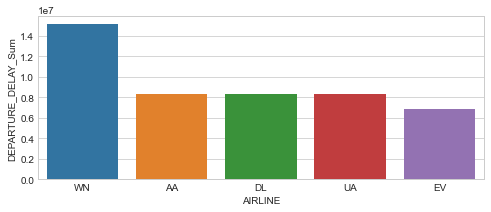

In [157]:
#Visualize top 5 departure delays

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.figure(figsize = (8,3))
sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY_Sum", data=df_delayedDep_Top5.toPandas())

Please describe here, how you answerd the  question. The answer should be short and to the point.

-I filtered only the positive values from DEPARTURE_DELAY, since these are the actual delays. Then took 
grouped sum to get the top 5 delays.

**Airlines Question 4 [15 Points]**

Part a: What was the average arrival delay per airline?

Part b: Also, for each airline, on average did flights arrive early or late?

Calculate the average arrival delay per airline. Then, add a column to this new dataframe (containing the grouped averages) that contains the string "Late" if the average arrival for that airline arrive >10 minutes late, "Early" if the average arrival is <0 minutes late, and "On-time" if the average arrival is between 0 and 10 minutes late.
To add the additional column, use a Spark UDF. Additionally, make sure to filter out or fill in null values in your dataframe (if there are any) prior to applying the UDE.

In [158]:
#Select schemas AIRLINE, ARRIVAL_DELAY, typecast string column to integer 
df_delayedArr = df.select("AIRLINE", "ARRIVAL_DELAY") \
                                        .withColumn("ARRIVAL_DELAY", \
                                        df.ARRIVAL_DELAY.cast(IntegerType()))
# Drop nulls
df_delayedArr.dropna()

# Average (Grouped) of arrival delay (minutes) for every Airline
#df_delayedArr_agg = df_delayedArr.groupBy('AIRLINE').agg(avg("ARRIVAL_DELAY").alias("ARRIVAL_DELAY_Avg"))

df_delayedArr_agg = df_delayedArr.groupBy('AIRLINE').agg(avg("ARRIVAL_DELAY").alias("ARRIVAL_DELAY_Avg"))\
                                                    .filter(~col("AIRLINE").like("%delayed%"))

df_delayedArr_agg.show()

+-------+-------------------+
|AIRLINE|  ARRIVAL_DELAY_Avg|
+-------+-------------------+
|     UA|  5.431593935741549|
|     NK| 14.471799501705833|
|     AA| 3.4513721447256764|
|     EV|  6.585378691739733|
|     B6|  6.677860800940307|
|     DL|0.18675361236390797|
|     OO|  5.845652151300072|
|     F9| 12.504706404706404|
|     US| 3.7062088424131026|
|     MQ|  6.457873460764516|
|     HA|  2.023092805197196|
|     AS|-0.9765630924118783|
|     VX|  4.737705721003135|
|     WN| 4.3749636792570525|
+-------+-------------------+



In [159]:
from pyspark.sql.functions import when
df_delayedArr_agg.withColumn("STATUS", when((df_delayedArr_agg.ARRIVAL_DELAY_Avg > 10), lit("Late")) \
                                       .when((df_delayedArr_agg.ARRIVAL_DELAY_Avg < 0), lit("Early")) \
                                       .otherwise(lit("On-Time"))) \
                                       .show()

+-------+-------------------+-------+
|AIRLINE|  ARRIVAL_DELAY_Avg| STATUS|
+-------+-------------------+-------+
|     UA|  5.431593935741549|On-Time|
|     NK| 14.471799501705833|   Late|
|     AA| 3.4513721447256764|On-Time|
|     EV|  6.585378691739733|On-Time|
|     B6|  6.677860800940307|On-Time|
|     DL|0.18675361236390797|On-Time|
|     OO|  5.845652151300072|On-Time|
|     F9| 12.504706404706404|   Late|
|     US| 3.7062088424131026|On-Time|
|     MQ|  6.457873460764516|On-Time|
|     HA|  2.023092805197196|On-Time|
|     AS|-0.9765630924118783|  Early|
|     VX|  4.737705721003135|On-Time|
|     WN| 4.3749636792570525|On-Time|
+-------+-------------------+-------+



Please describe here, how you answerd the  question. The answer should be short and to the point.

**Airlines Question 5 [5 Points]**

What is the difference between parquet and delta format?

What advantage or dis-advantage does the delta format have over the parquet format?

Note: Cite any sources used. You do not need a code answer for this question.

**Airlines Question 6 [5 Points]**

If you needed to keep multiple versions of this dataset, which format of data would you choose? parquet or delta?

Explain your choice!

# Using Baby Names Data Set

This dataset comes from a website referenced by [Data.gov](https://health.data.ny.gov/api/views/jxy9-yhdk/rows.json?accessType=DOWNLOAD). 

It lists baby names used in the state of NY from 2007. 

Scrape the data from the given link in to a json file.

**Baby Names Question 1 - Nested Data [15 Points]**

Use Spark SQL's native JSON support to read the baby names file into a dataframe. Use this dataframe to create a temporary table containing all the nested data columns ("sid", "id", "position", "created_at", "created_meta", "updated_at", "updated_meta", "meta", "year", "first_name", "county", "sex", "count") so that they can be queried using SQL.

Hint: you can use dbutils.fs.head() to take a look at the dataset before reading it in.

Suggested Steps:
1.	Read in the JSON data
2.	Pull all columns in the nested data column to top level, following the schema specified above. There are built-in Spark SQL functions that will accomplish this.
3.	Create a temp table from this expanded dataframe using createOrReplaceTempView()

Note: As before, please only use [PySpark](https://spark.apache.org/docs/latest/api/python/reference/index.html) to perform your data manipulation unless otherwise mentioned
      Use a markdown cell to explain your code in a few sentences as before.

In [23]:
import pyspark
from pyspark import SparkContext, SQLContext
from pyspark.sql.session import SparkSession
from pyspark import *

In [24]:
from pyspark.sql import SparkSession

sqlContext = SparkSession.builder.appName("babyname").getOrCreate()
sqlContext

In [25]:
from IPython.core.display import HTML
display(HTML("<style>pre {white-space: pre !important; }</style>"))

In [26]:
import requests, json
url = "https://health.data.ny.gov/api/views/jxy9-yhdk/rows.json?accessType=DOWNLOAD"
r = requests.get(url).json()

In [27]:
r

{'meta': {'view': {'id': 'jxy9-yhdk',
   'name': 'Baby Names: Beginning 2007',
   'assetType': 'dataset',
   'attribution': 'New York State Department of Health',
   'attributionLink': 'http://www.health.ny.gov/statistics/vital_statistics/',
   'averageRating': 0,
   'category': 'Health',
   'createdAt': 1356724562,
   'description': 'New York State Baby Names are aggregated and displayed by the year, county, or borough where the mother resided as stated on a New York State or New York City (NYC) birth certificate. The frequency of the baby name is listed if there are 5 or more of the same baby name in a county outside of NYC or 10 or more of the same baby name in a NYC borough.',
   'displayType': 'table',
   'downloadCount': 83364,
   'hideFromCatalog': False,
   'hideFromDataJson': False,
   'indexUpdatedAt': 1527713966,
   'newBackend': True,
   'numberOfComments': 0,
   'oid': 28927042,
   'provenance': 'official',
   'publicationAppendEnabled': False,
   'publicationDate': 152771

In [28]:
from pyspark.sql.functions import explode

sqlContext.read.json('/Users/nischalneupane/Desktop/rows.json', multiLine=True) \
          .select(explode("data").alias("data")).createOrReplaceTempView('View_baby')


In [29]:
sqlContext.sql("SELECT data[0] AS sid, data[1] AS id, data[2] AS position,\
                data[3] AS created_at, data[4] AS created_meta, data[5] AS updated_at, \
                data[6] AS updated_meta, data[7] AS meta, data[8] AS year, \
                data[9] AS first_name, data[10] AS country, data[11] AS sex, data[12] AS name_count FROM View_baby") \
                .createOrReplaceTempView("TempViewbabynames")

                

In [30]:
sqlContext.sql("SELECT * FROM TempViewbabynames LIMIT 5").show()


+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+-------+---+----------+
|               sid|                  id|position|created_at|created_meta|updated_at|updated_meta|meta|year|first_name|country|sex|name_count|
+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+-------+---+----------+
|row-r9pv-p86t.ifsp|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|2007|      ZOEY|  KINGS|  F|        11|
|row-7v2v~88z5-44se|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|2007|      ZOEY|SUFFOLK|  F|         6|
|row-hzc9-4kvv~mbc9|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|2007|      ZOEY| MONROE|  F|         6|
|row-3473_8cwy~3vez|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|2007|      ZOEY|   ERIE|  F|         9|

**Baby Names Question 2 - Multiple Languages [10 Points]**

Using the temp table you created in the question above, write a SQL query that gives the most popular baby name for each year in the dataset.

Then, write the same query using either the Scala or Python dataframe APIs.

Compare your answers from the two queries

In [31]:
df_temp_babyNames = sqlContext.sql("SELECT * FROM TempViewbabynames")


In [32]:
# Add a rank column
from pyspark.sql.window import *
from pyspark.sql.functions import *

windowSpec = Window.partitionBy("year").orderBy(desc("name_count"))

df_babyNames_ranked = df_temp_babyNames.withColumn("rank", dense_rank().over(windowSpec)).where(col("rank") == 1)
df_babyNames_ranked.show()  


+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+--------+---+----------+----+
|               sid|                  id|position|created_at|created_meta|updated_at|updated_meta|meta|year|first_name| country|sex|name_count|rank|
+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+--------+---+----------+----+
|row-4sc7-n43q_fazt|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|2012|     JASON|   KINGS|  M|        99|   1|
|row-ybxt-73ee.wtim|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|2012|   MADISON|   BRONX|  F|        99|   1|
|row-9nks-5pme_rabp|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|2016|   MATTHEW|   Bronx|  M|        99|   1|
|row-hxyj-pq9u-yz6t|00000000-0000-000...|       0|1574264158|        null|1574264158|        null| { }|201

In [33]:
#Most popular baby names
df_babyNames_popular = df_babyNames_ranked.select("first_name", "name_count", "year")
df_babyNames_popular.show()

+----------+----------+----+
|first_name|name_count|year|
+----------+----------+----+
|      JOHN|        99|2007|
|      JAKE|        99|2007|
|  JEREMIAH|        99|2008|
|   MATTHEW|        99|2008|
|      JACK|        99|2009|
|    SOPHIA|        99|2009|
|   MADISON|        99|2009|
|     CHAIM|        99|2010|
|    JUSTIN|        99|2010|
|     LOGAN|        99|2010|
|   GABRIEL|        99|2011|
|    JAYDEN|        99|2011|
|    JOSHUA|        99|2011|
|  MENACHEM|        99|2011|
|       MIA|        99|2011|
|     AARON|        99|2011|
|     JASON|        99|2012|
|   MADISON|        99|2012|
|     JAMES|        99|2013|
|     AARON|        99|2013|
+----------+----------+----+
only showing top 20 rows



**Baby Names Question 3 - Performance [10 Points]**

Are there any performance considerations when choosing a language API (SQL vs Python vs Scala) in the context of Spark?

Are there any performance considerations when using different data representations (RDD, Dataframe) in Spark? Please explain, and provide references if possible. No code answer is required.

## Machine Learning section (45 points) + (15 brownie points)

For this exercise, you will be using the [adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

This is a simple binary classification problem. 

The target column is income.

You will be predicting whether an adult earns more or less than 50k using his/her various attributes like age, education level, job etc.

Split the data in to train-test (75:25). Build your model on 75% of the data and report model performance on 25% of the data

This will be a machine learning exercise. **Please use the [Spark MLIB API](https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html)**

The analysis should include,


- Brief descriptive analysis   (5 points)
- Data cleaning including null value imputation if necessary  (5 points)
- Data engineering. How did you handle class imbalance? Was any action necessary? (explain your thinking behind creating new features) (5 points)
- Hyper parameter optimisation (explain how you chose the best parameters for your model) (10 points)
- Data modeling  (5 points)
- Use the model to predict on the test set  (5 points)
- Build atleast two models, Decision tree based (Random forest, XgBoost) and non-tree based models (Logistic regression, Support vector machines etc) (5 points)
- Compare the predictions from your two models (5 points)

Some important points to keep in mind,

- You will be evaluated on how you approached the problem
- Your code should be clean
- Summarize your approach after every step (Keep the explanation short. Straight to the point.)

Extra points if you can include the below mentioned pointsin your analysis,     (15 points) 

- Use different hyper-parameter optimization methods (Grid search, random search, Bayesian optimisation)
- Compare the best hyper-parameters from different optimisation approaches
- Which optimisation approach do you think is best? Why?

https://github.com/minrk/findspark

In [34]:
# Load our Pkgs
#import findspark
#findspark.init()

from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession


In [35]:
spark1 = SparkSession.builder.appName("AdultIncome_MLLIB").getOrCreate()
spark1

### Load the dataset

In [36]:
# Load the dataset
from IPython.core.display import HTML
display(HTML("<style>pre {white-space: pre !important; }</style>"))
spark1.maxToStringFields=40

df = spark1.read.csv("adult.csv",header=True,inferSchema=True)
df.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 25|         Private|226802|        11th|              7|     Never-married|Machine-op-inspct|    Own-child|             Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|         Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|      Husband|             White|  Male|           0|           0|            50| United-States| <=50K|
| 28|

In [37]:
# General statistical summary
df.describe().toPandas().T


,0,1,2,3,4
summary,count,mean,stddev,min,max
age,48842,38.64358543876172,13.710509934443518,17,90
workclass,48842,None,None,?,Without-pay
fnlwgt,48842,189664.13459727284,105604.02542315758,12285,1490400
education,48842,None,None,10th,Some-college
educational-num,48842,10.078088530363212,2.570972755592256,1,16
marital-status,48842,None,None,Divorced,Widowed
occupation,48842,None,None,?,Transport-moving
relationship,48842,None,None,Husband,Wife
race,48842,None,None,Amer-Indian-Eskimo,White


In [38]:
#Check schema and datatypes (after inferschema = True)
#df.dtypes
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



### Check and visualize the distrubution of target variable

#If highly imbalanced, we will use F1, and accordingly Accuracy etc. \
#Alternatively, we can also use over/under-sampling method increase and impute the rare class label

+------+-----+
|income|count|
+------+-----+
| <=50K|37155|
|  >50K|11687|
+------+-----+



<AxesSubplot:xlabel='income', ylabel='count'>

<Figure size 576x216 with 0 Axes>

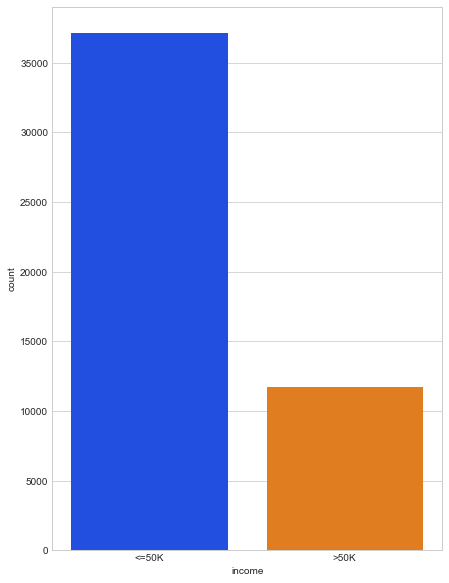

In [39]:
#Check for imbalace / skewded class distrubution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.figure(figsize = (8,3))

df_income = df.groupBy('income').count()
df_income.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 10))
sns.barplot(x="income", y="count", data=df_income.toPandas(), palette='bright')

In [40]:
# Check every label seperately with age
df.crosstab('age', 'income').sort("age_income").show()


+----------+-----+----+
|age_income|<=50K|>50K|
+----------+-----+----+
|        17|  595|   0|
|        18|  862|   0|
|        19| 1050|   3|
|        20| 1112|   1|
|        21| 1090|   6|
|        22| 1161|  17|
|        23| 1307|  22|
|        24| 1162|  44|
|        25| 1119|  76|
|        26| 1068|  85|
|        27| 1117| 115|
|        28| 1101| 179|
|        29| 1025| 198|
|        30| 1031| 247|
|        31| 1050| 275|
|        32|  957| 296|
|        33| 1045| 290|
|        34|  949| 354|
|        35|  997| 340|
|        36|  948| 400|
+----------+-----+----+
only showing top 20 rows



### We can consider this as a fairly balanced dataset and take Accuracy as the performance metric. Alternatively, we can  try random oversampling the rare class label and experiment with different results 



#### Check counts on missing values: nan and null

In [41]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(var)|col(var).isNull(), var)).alias(var) for var in df.columns]).show()


+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|education|educational-num|marital-status|occupation|relationship|race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+
|  0|        0|     0|        0|              0|             0|         0|           0|   0|     0|           0|           0|             0|             0|     0|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+



+--------------------+------------------+
|      marital-status| avg(capital-gain)|
+--------------------+------------------+
|           Separated| 581.8424836601307|
|       Never-married|  384.382639449029|
|Married-spouse-ab...| 629.0047770700637|
|            Divorced| 793.6755615860094|
|             Widowed| 603.6442687747035|
|   Married-AF-spouse|2971.6216216216217|
|  Married-civ-spouse|1739.7006121810625|
+--------------------+------------------+



<AxesSubplot:xlabel='marital-status', ylabel='avg(capital-gain)'>

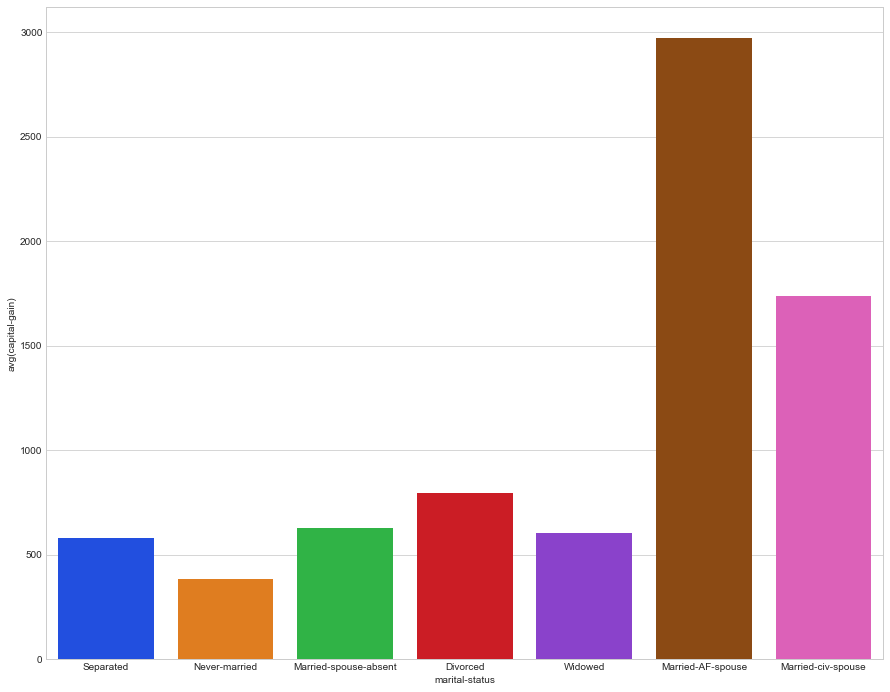

In [42]:
df_statusCapgain = df.groupby('marital-status').agg({'capital-gain': 'mean'})
df_statusCapgain.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 12))
sns.barplot(x="marital-status", y="avg(capital-gain)", data=df_statusCapgain.toPandas(), palette='bright')

##### People that never married have the lowest and those married to civilian highest.

#### Check the Distribution of numerical features

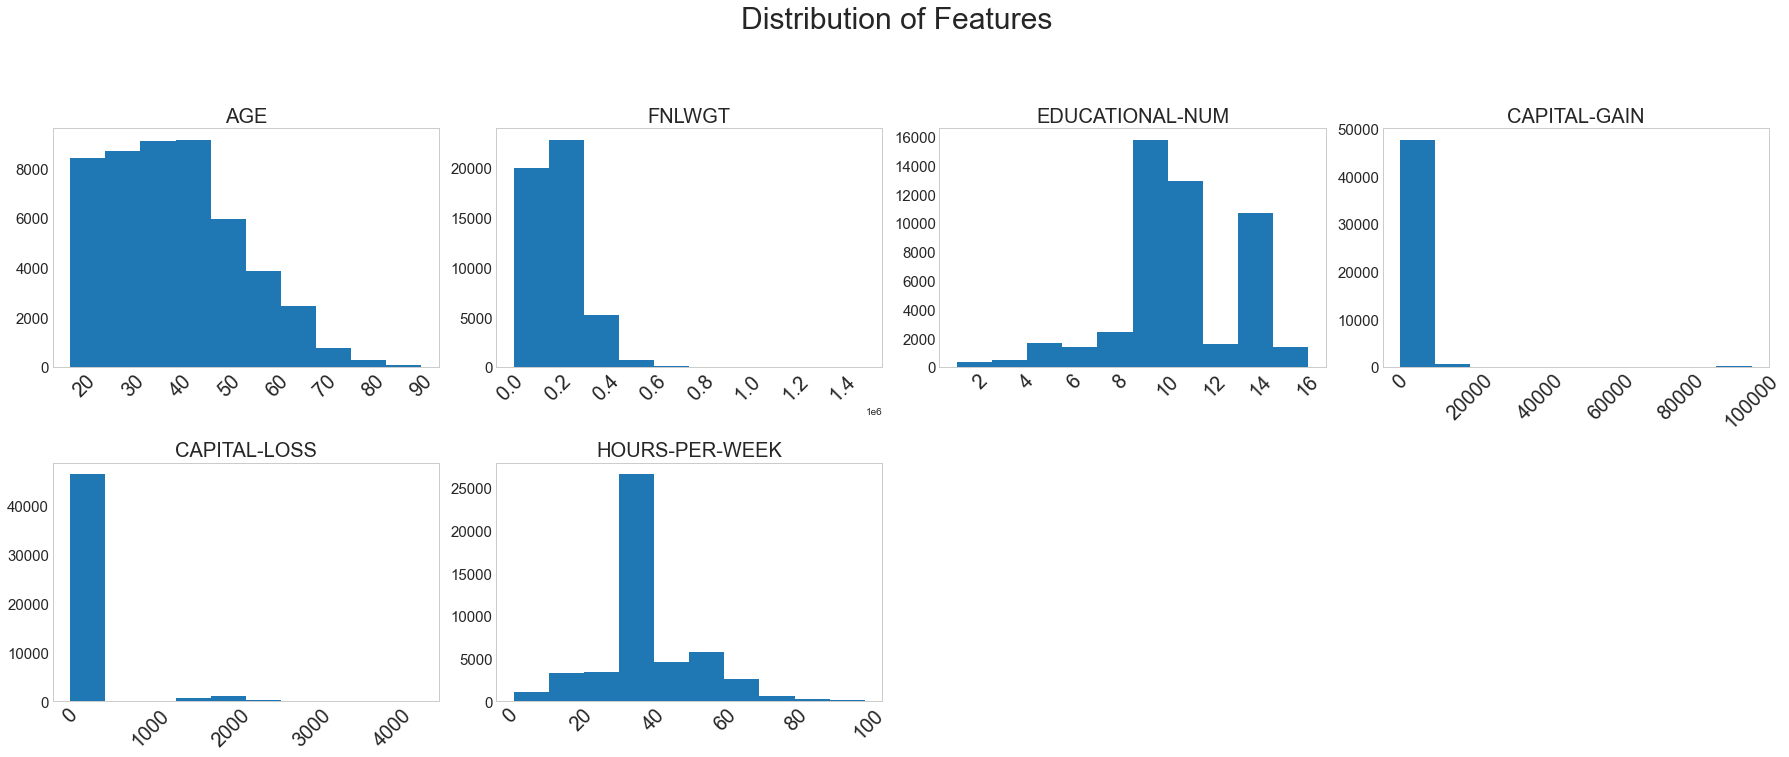

In [43]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=30, verticalalignment="center")

for col, num in zip(df.toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3, 4, num)
    ax.hist(df.toPandas()[col])
    plt.grid(False)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

+---+------+
|age|fnlwgt|
+---+------+
| 25|226802|
| 38| 89814|
| 28|336951|
| 44|160323|
| 18|103497|
+---+------+
only showing top 5 rows



<AxesSubplot:xlabel='age', ylabel='fnlwgt'>

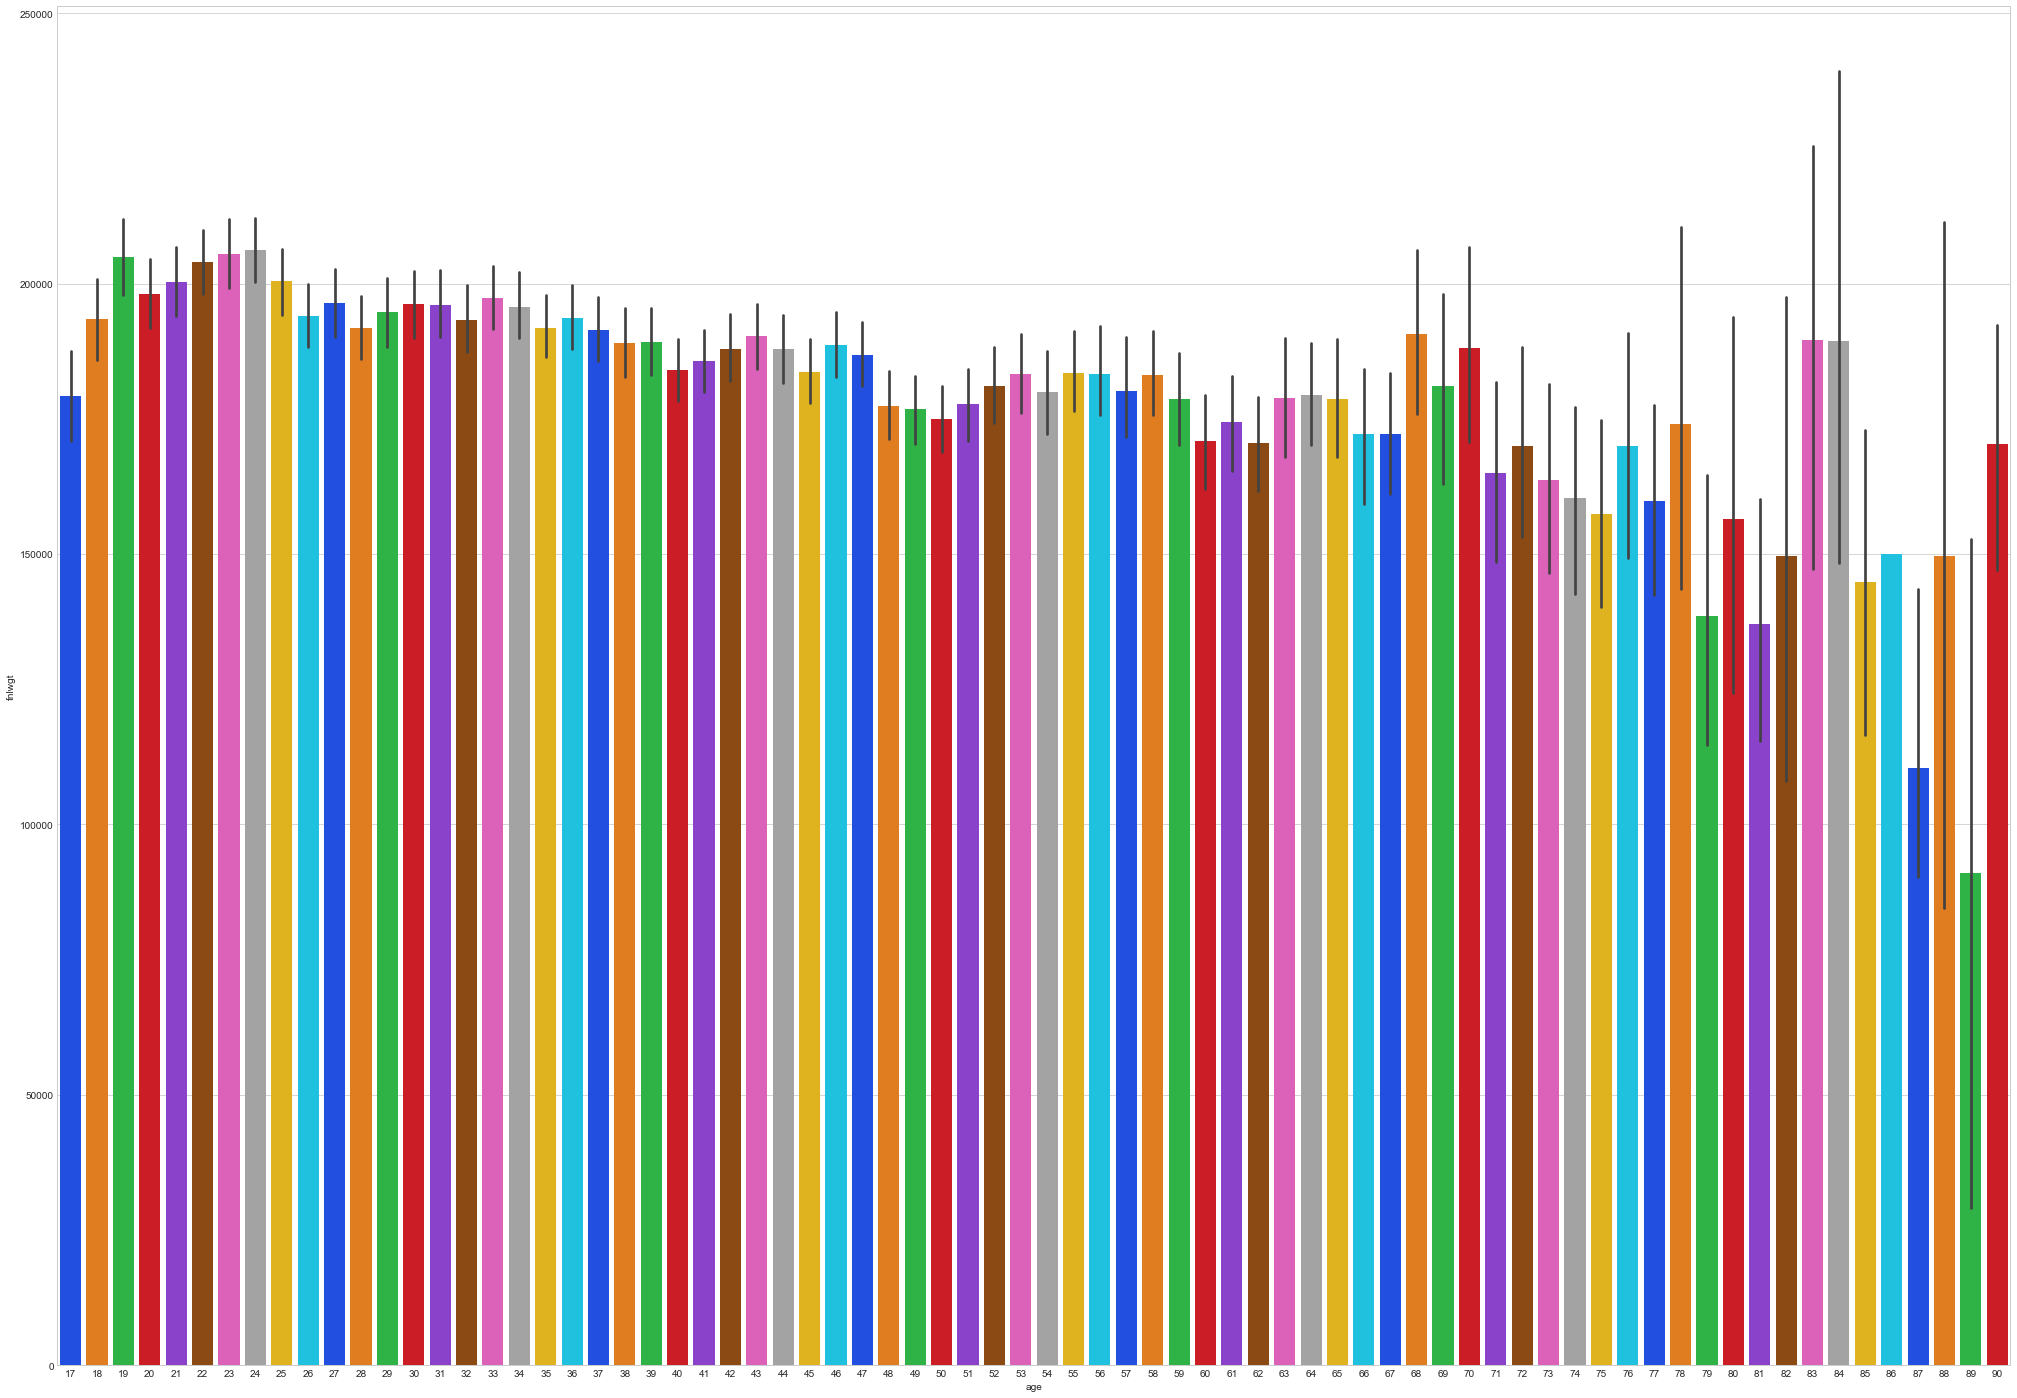

In [44]:

df.select('age','fnlwgt').show(5)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(35, 25))
sns.barplot(x="age", y="fnlwgt", data=df.toPandas(), palette='bright')


## Unique Values and count for education column


In [45]:
# To consider: ordinal encoding, encode {1: Doctorate, Masters, Bachelors},  etc  

+------------+-----+
|   education|count|
+------------+-----+
|        10th| 1389|
|     Masters| 2657|
|     5th-6th|  509|
|  Assoc-acdm| 1601|
|   Assoc-voc| 2061|
|     7th-8th|  955|
|         9th|  756|
|     HS-grad|15784|
|   Bachelors| 8025|
|        11th| 1812|
|     1st-4th|  247|
|   Preschool|   83|
|        12th|  657|
|   Doctorate|  594|
|Some-college|10878|
| Prof-school|  834|
+------------+-----+



<AxesSubplot:xlabel='education', ylabel='count'>

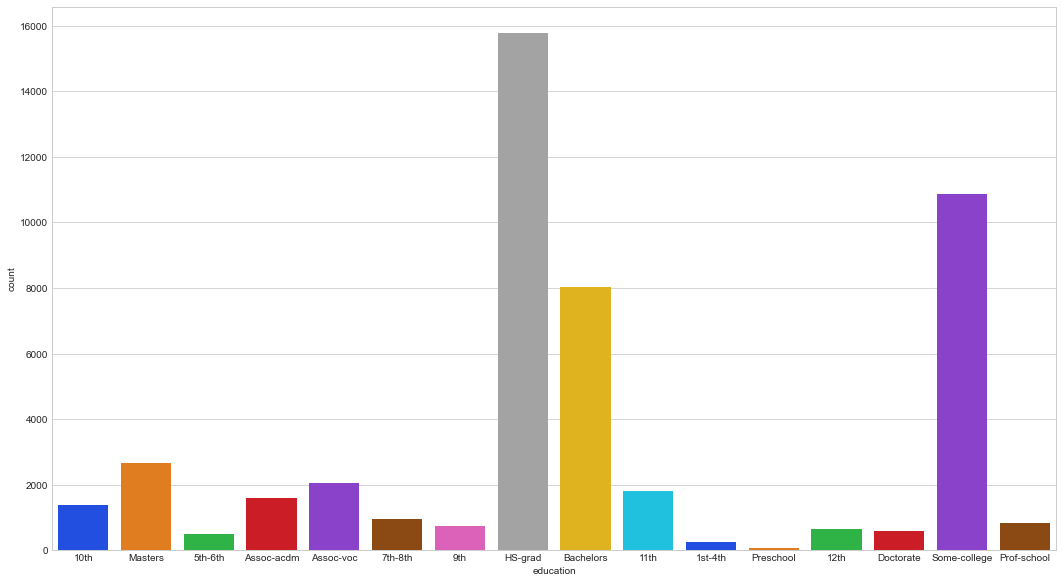

In [46]:
df_education = df.groupBy('education').count()
df_education.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18, 10))
sns.barplot(x="education", y="count", data=df_education.toPandas(), palette='bright')

+----------------+-----+
|       workclass|count|
+----------------+-----+
|Self-emp-not-inc| 3862|
|       Local-gov| 3136|
|       State-gov| 1981|
|         Private|33906|
|     Without-pay|   21|
|     Federal-gov| 1432|
|    Never-worked|   10|
|               ?| 2799|
|    Self-emp-inc| 1695|
+----------------+-----+



<AxesSubplot:xlabel='workclass', ylabel='count'>

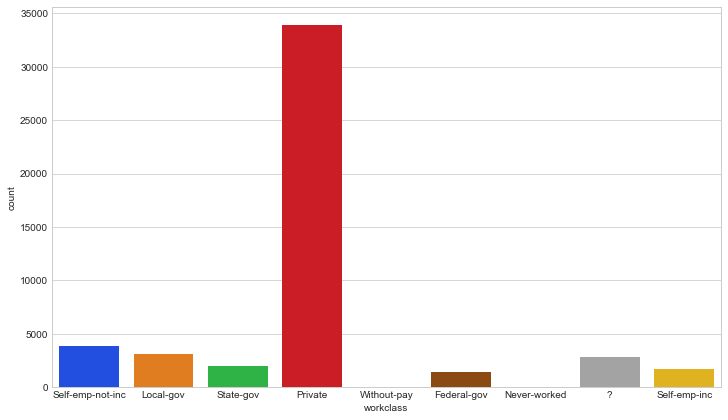

In [47]:
# Distinct Values for workclass and their counts
df_workclass = df.groupBy('workclass').count()
df_workclass.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(x="workclass", y="count", data=df_workclass.toPandas(), palette='bright')

+--------------------+-----+
|      marital-status|count|
+--------------------+-----+
|           Separated| 1530|
|       Never-married|16117|
|Married-spouse-ab...|  628|
|            Divorced| 6633|
|             Widowed| 1518|
|   Married-AF-spouse|   37|
|  Married-civ-spouse|22379|
+--------------------+-----+



<AxesSubplot:xlabel='marital-status', ylabel='count'>

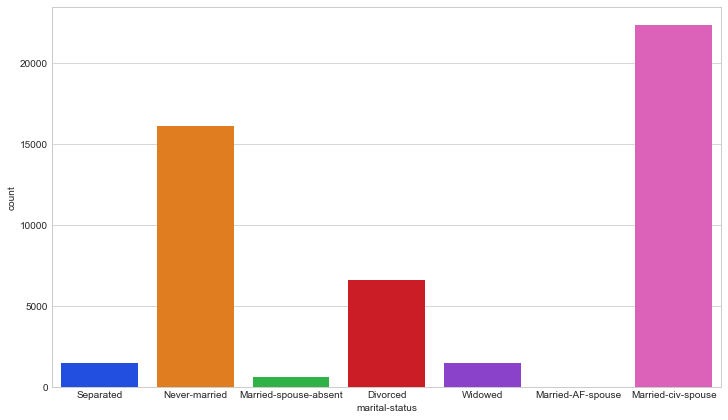

In [48]:
# Distinct Values for marital-status and their counts
df_maritalstatus = df.groupBy('marital-status').count()
df_maritalstatus.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(x="marital-status", y="count", data=df_maritalstatus.toPandas(), palette='bright')

+-----------------+-----+
|       occupation|count|
+-----------------+-----+
|            Sales| 5504|
|  Exec-managerial| 6086|
|   Prof-specialty| 6172|
|Handlers-cleaners| 2072|
|  Farming-fishing| 1490|
|     Craft-repair| 6112|
| Transport-moving| 2355|
|  Priv-house-serv|  242|
|  Protective-serv|  983|
|    Other-service| 4923|
|     Tech-support| 1446|
|Machine-op-inspct| 3022|
|     Armed-Forces|   15|
|                ?| 2809|
|     Adm-clerical| 5611|
+-----------------+-----+



<AxesSubplot:xlabel='occupation', ylabel='count'>

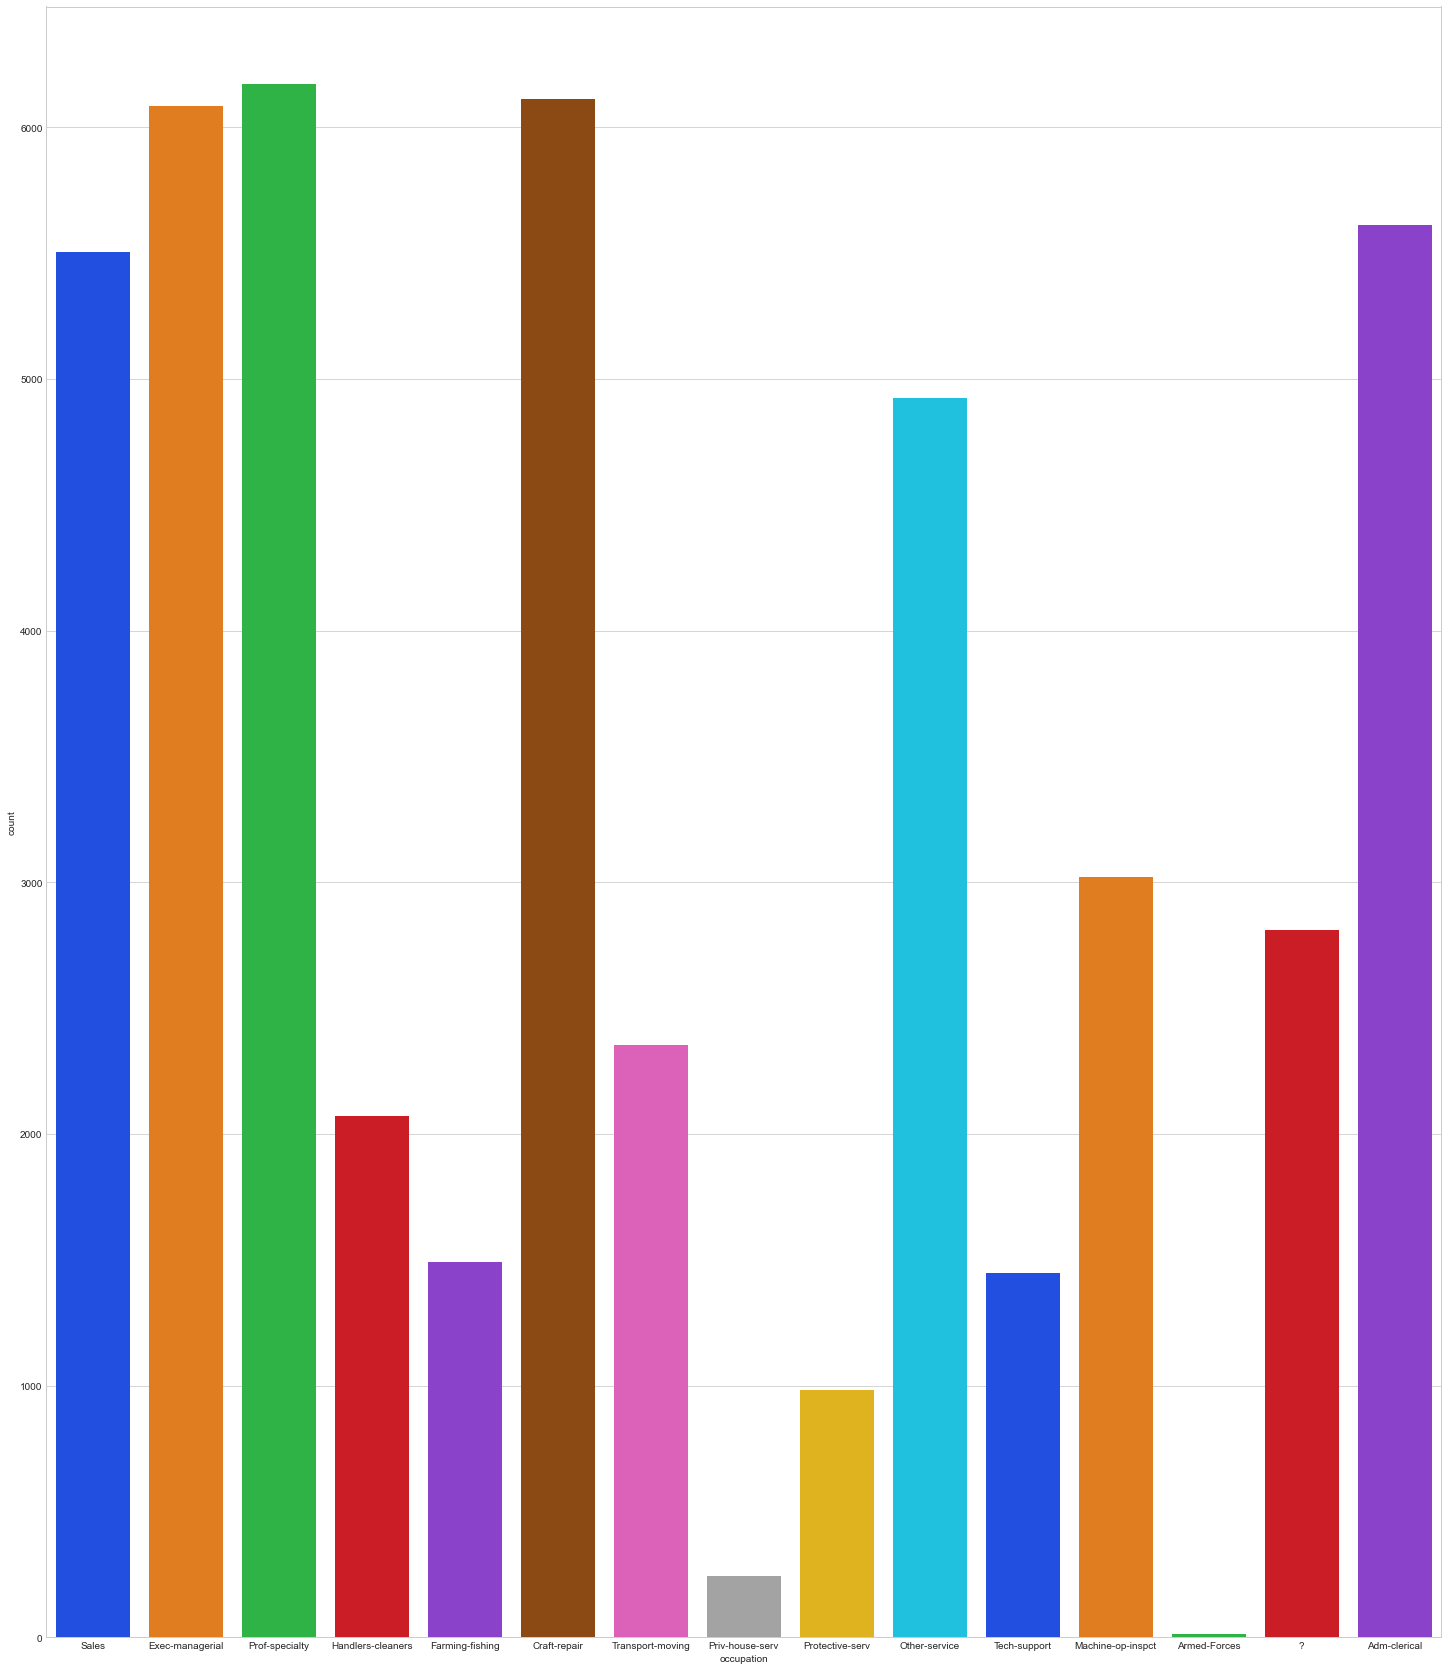

In [49]:
# Distinct Values for occupation and their counts
df_occupation = df.groupBy('occupation').count()
df_occupation.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,30))
sns.barplot(x="occupation", y="count", data=df_occupation.toPandas(), palette='bright')

+--------------+-----+
|  relationship|count|
+--------------+-----+
|     Own-child| 7581|
| Not-in-family|12583|
|     Unmarried| 5125|
|          Wife| 2331|
|Other-relative| 1506|
|       Husband|19716|
+--------------+-----+



<AxesSubplot:xlabel='relationship', ylabel='count'>

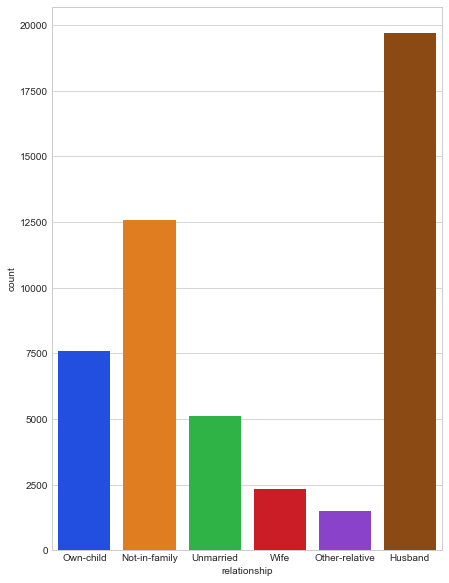

In [50]:
# Distinct Values for relationship and their counts
df_relationship = df.groupBy('relationship').count()
df_relationship.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,10))
sns.barplot(x="relationship", y="count", data=df_relationship.toPandas(), palette='bright')

+------------------+-----+
|              race|count|
+------------------+-----+
|             Other|  406|
|Amer-Indian-Eskimo|  470|
|             White|41762|
|Asian-Pac-Islander| 1519|
|             Black| 4685|
+------------------+-----+



<AxesSubplot:xlabel='race', ylabel='count'>

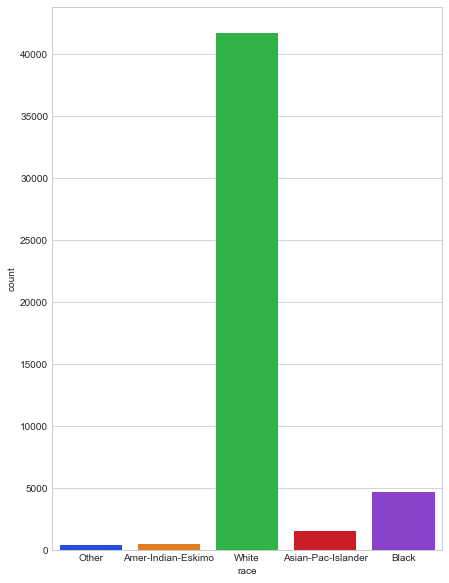

In [51]:
# Distinct Values for race and their counts
df_race = df.groupBy('race').count()
df_race.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,10))
sns.barplot(x="race", y="count", data=df_race.toPandas(), palette='bright')

+------+-----+
|gender|count|
+------+-----+
|Female|16192|
|  Male|32650|
+------+-----+



<AxesSubplot:xlabel='gender', ylabel='count'>

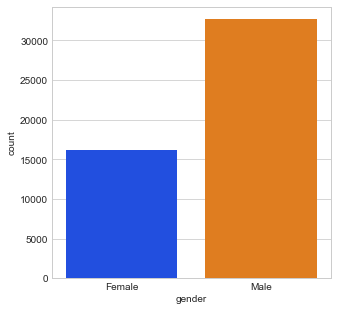

In [52]:
# Distinct Values for gender and their counts
df_gender = df.groupBy('gender').count()
df_gender.show()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
sns.barplot(x="gender", y="count", data=df_gender.toPandas(), palette='bright')

In [53]:
# Distinct Values for native-country and their counts
df_nativecountry = df.groupBy('native-country').count()
df_nativecountry.show()

+------------------+-----+
|    native-country|count|
+------------------+-----+
|       Philippines|  295|
|           Germany|  206|
|          Cambodia|   28|
|            France|   38|
|            Greece|   49|
|            Taiwan|   65|
|           Ecuador|   45|
|         Nicaragua|   49|
|              Hong|   30|
|              Peru|   46|
|             India|  151|
|             China|  122|
|             Italy|  105|
|Holand-Netherlands|    1|
|              Cuba|  138|
|             South|  115|
|              Iran|   59|
|           Ireland|   37|
|          Thailand|   30|
|              Laos|   23|
+------------------+-----+
only showing top 20 rows



In [54]:
#Row count for every country
from pyspark.sql.functions import *

df_native = df.groupby('native-country').agg({'native-country': 'count'}).sort(asc("count(native-country)"))
df_native.show()


+--------------------+---------------------+
|      native-country|count(native-country)|
+--------------------+---------------------+
|  Holand-Netherlands|                    1|
|             Hungary|                   19|
|            Honduras|                   20|
|            Scotland|                   21|
|          Yugoslavia|                   23|
|Outlying-US(Guam-...|                   23|
|                Laos|                   23|
|     Trinadad&Tobago|                   27|
|            Cambodia|                   28|
|                Hong|                   30|
|            Thailand|                   30|
|             Ireland|                   37|
|              France|                   38|
|             Ecuador|                   45|
|                Peru|                   46|
|              Greece|                   49|
|           Nicaragua|                   49|
|                Iran|                   59|
|              Taiwan|                   65|
|         

In [55]:
#Let's drop Holand-Netherlands since it's presence is redundant and adds no value
df = df.filter(df['native-country'] != 'Holand-Netherlands')
df.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 25|         Private|226802|        11th|              7|     Never-married|Machine-op-inspct|    Own-child|             Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|         Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|      Husband|             White|  Male|           0|           0|            50| United-States| <=50K|
| 28|

In [56]:
#Remove all rows containing ? values (we could have alternatively replaced ? with nan and performed mode imputation)

from pyspark.sql.functions import col
df = df.filter(~col("workclass").like("%?%"))
df.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 25|         Private|226802|        11th|              7|     Never-married|Machine-op-inspct|    Own-child|             Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|         Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|      Husband|             White|  Male|           0|           0|            50| United-States| <=50K|
| 28|

## Encode the categorical features using OneHotEncoding and create Pipeline

In [57]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

cat_feat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [58]:
#Create empty list to store pipeline statages 
stages = [] 

#### Categorical columns are indexed using StringIndexer by encoding a string column of labels to a column of label indices and finally we add these stages in the pipeline for all columns.

In [59]:
for categoricalCol in cat_feat:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],
                            outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
    

In [60]:
# Dependent feature income indexed
label_strIndex =  StringIndexer(inputCol="income", outputCol="newincome")
stages += [label_strIndex]

In [61]:
#Numeric Features
num_feat = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]

#### Numeric  features added to the input for the VectorAssembler to combine original features with transforfed features


In [62]:
assemblerInputs = [cat + "classVec" for cat in cat_feat] + num_feat
assemblerInputs

['workclassclassVec',
 'educationclassVec',
 'marital-statusclassVec',
 'occupationclassVec',
 'relationshipclassVec',
 'raceclassVec',
 'genderclassVec',
 'native-countryclassVec',
 'age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [63]:
# VectorAssembler transforms the dataframe by combining feature lists into a single vector feature. 

assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

### Build the pipeline and fit the transformed dataframe

In [64]:
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df)
model = pipelineModel.transform(df)

# Model Building

In [65]:
from pyspark.ml.linalg import DenseVector

input_data = model.rdd.map(lambda x: (x["newincome"], DenseVector(x["features"])))
df_train = spark1.createDataFrame(input_data, ["income", "features"])
df_train.printSchema()
#df_train.show()

root
 |-- income: double (nullable = true)
 |-- features: vector (nullable = true)



In [66]:
# train test split
train_data, test_data = df_train.randomSplit([.75,.25], seed=100)

### Logistic Regression 

In [67]:
from pyspark.ml.classification import LogisticRegression

logReg = LogisticRegression(labelCol="income", featuresCol="features", maxIter=20, regParam=0.5)
linearModel = logReg.fit(train_data)

In [68]:
print("Coefficients: " + str(linearModel.coefficients))
print("Intercept: " + str(linearModel.intercept))

Coefficients: [-0.05207954456160439,-0.0450333510259933,0.015028486802349632,-0.013449299581866936,0.2253430420790725,0.17174636534261248,-0.18196793269292563,-0.12132064007124015,-0.037081618156902425,0.18217763791267327,0.3010855241326382,0.001273274544386822,-0.17155523125118136,0.015357844544736614,-0.18198537415018415,-0.19875553994819503,0.45114913877600804,-0.17763601636383555,-0.1277715380749225,0.40550589194062114,-0.1636209696492728,-0.21241960413035424,0.3255851331190994,-0.24784803815868484,-0.15074757532521332,-0.14825628561915952,-0.11621376220190739,-0.10473745826661628,0.19218799114431062,-0.04808529254343577,0.264618312980352,-0.08139220734823932,0.04226002450284758,-0.19928747219798135,-0.13617250590043992,-0.06177811195322037,-0.18281707972242503,-0.2134194564008661,0.06816539828754913,0.0684932725576657,-0.1761145370212042,-0.04308229611492144,0.2835856011467834,-0.1640942233182446,-0.22388977048459877,-0.16806764769974036,0.30567405639454565,0.07412678322410848,-0.

In [69]:
predictions = linearModel.transform(test_data)
predictions.printSchema()

root
 |-- income: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [70]:
selected_predictions = predictions.select("income", "prediction", "probability")
selected_predictions.show(20)

+------+----------+--------------------+
|income|prediction|         probability|
+------+----------+--------------------+
|   0.0|       0.0|[0.93645681344628...|
|   0.0|       0.0|[0.92821471569124...|
|   0.0|       0.0|[0.93054994284304...|
|   0.0|       0.0|[0.91941317094318...|
|   0.0|       0.0|[0.91315409979909...|
|   0.0|       0.0|[0.91511206143715...|
|   0.0|       0.0|[0.69169718442762...|
|   0.0|       0.0|[0.79189457030643...|
|   0.0|       0.0|[0.78141023998404...|
|   0.0|       0.0|[0.67656423754692...|
|   0.0|       1.0|[0.34347677097462...|
|   0.0|       1.0|[0.34746102071178...|
|   0.0|       1.0|[0.38210567415056...|
|   0.0|       0.0|[0.84076974860274...|
|   0.0|       0.0|[0.92200273105252...|
|   0.0|       0.0|[0.69100214697033...|
|   0.0|       0.0|[0.83753032250268...|
|   0.0|       0.0|[0.82151687327825...|
|   0.0|       0.0|[0.79906839254351...|
|   0.0|       0.0|[0.82410103556038...|
+------+----------+--------------------+
only showing top

In [71]:
#check predictions
confMat = predictions.select("income", "prediction")

confMat.groupby('income').agg({'income': 'count'}).show()
confMat.groupby('prediction').agg({'prediction': 'count'}).show()


+------+-------------+
|income|count(income)|
+------+-------------+
|   0.0|         8585|
|   1.0|         2902|
+------+-------------+



+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|            10712|
|       1.0|              775|
+----------+-----------------+



In [72]:
#model accuracy 
def model_accuracy(trained_model): 
    predictions = trained_model.transform(test_data)
    confMat = predictions.select("income", "prediction")
    accuracy = confMat.filter(confMat.income == confMat.prediction).count() / confMat.count()
    print("Model accuracy: %.3f%%" % (accuracy * 100)) 

model_accuracy(trained_model = linearModel)

Model accuracy: 79.185%


### ROC/AUC

In [73]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

In [74]:
# Evaluate predictions on renamed features
predictions = predictions.withColumnRenamed("income", "label")
print(evaluator.evaluate(predictions))
print(evaluator.getMetricName())

0.8816486290458163
areaUnderROC


## Hyperparameter optimization

In [75]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder().addGrid(logReg.regParam, [0.01, 0.5, 0.7, 0.9]).build())


In [76]:
from time import *
start_time = time()

#### Fit Logistic Regression with 4 folds cross validations and track modeling time

In [77]:
crossVal = CrossValidator(estimator=logReg, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=4)
train_data = train_data.withColumn("label", col("income"))
crossVal_model = crossVal.fit(train_data)

In [78]:
end_time = time()
elapsed_time = end_time - start_time
print(f"Time to train model: {elapsed_time} seconds")

Time to train model: 841.0416309833527 seconds


In [79]:
model_accuracy(crossVal_model)


Model accuracy: 83.790%


In [80]:
bestModel = crossVal_model.bestModel
bestModel.extractParamMap()

{Param(parent='LogisticRegression_92eecd52ca78', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2,
 Param(parent='LogisticRegression_92eecd52ca78', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0,
 Param(parent='LogisticRegression_92eecd52ca78', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto',
 Param(parent='LogisticRegression_92eecd52ca78', name='featuresCol', doc='features column name.'): 'features',
 Param(parent='LogisticRegression_92eecd52ca78', name='fitIntercept', doc='whether to fit an intercept term.'): True,
 Param(parent='LogisticRegression_92eecd52ca78', name='labelCol', doc='label column name.'): 'income',
 Param(parent='LogisticRegression_92eecd52ca78', name='maxBlockSizeInMB', doc='maximum memory in MB for 

### Tree based models

In [81]:
from pyspark.ml.classification import (DecisionTreeClassifier, RandomForestClassifier, GBTClassifier)
from pyspark.ml import Pipeline

decisionTree = DecisionTreeClassifier(labelCol = 'income', featuresCol = 'features')
randomForest = RandomForestClassifier(labelCol = 'income', featuresCol = 'features')
gradientBoost = GBTClassifier(labelCol = 'income', featuresCol = 'features')

In [82]:
decisionTree_model = decisionTree.fit(train_data)
randomForest_model = randomForest.fit(train_data)
gradientBoost_model = gradientBoost.fit(train_data)

In [83]:
decisionTree_pred = decisionTree_model.transform(test_data)
randomForest_pred = randomForest_model.transform(test_data)
randomForest_pred = gradientBoost_model.transform(test_data)

In [84]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

binary_evaluator = BinaryClassificationEvaluator(labelCol = 'income')

print('Decision Tree:', binary_evaluator.evaluate(decisionTree_pred))
print('Random Forest:' , binary_evaluator.evaluate(randomForest_pred))
print('Gradient-boosted Trees:', binary_evaluator.evaluate(randomForest_pred))


Decision Tree: 0.5585810721583774


22/04/27 18:04:04 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/04/27 18:04:04 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


Random Forest: 0.907207810009525


Gradient-boosted Trees: 0.9072083117421081
